In [1]:
import numpy as np
import scipy.linalg as la
import scipy.interpolate as interp
import matplotlib.pyplot as plt
import scipy

In [2]:
def SplineCoefs (x, y, num_of_nodes, Xk, aplha):
    n = len(x)
    e = np.eye (n)
    Phi = np.zeros ((n,num_of_nodes+4)) # Matrix of basic functions
    RegAlpha = np.eye (num_of_nodes+4) * alpha     
    Phi = BasicFunctionsSpline (num_of_nodes, Xk, x) 
    PhiT = Phi.T
    G = PhiT @ Phi + RegAlpha
    z = PhiT @ y
    a = np.linalg.solve(G, z)  
    return a

In [3]:
def SplineValues(a, x):
    Phi = BasicFunctionsSpline (num_of_nodes, Xk, x)
    values = Phi@a
    return values

In [12]:
def BasicFunctionsSpline (num_of_nodes, Xk, x):
    m = num_of_nodes + 4 
    PhiFunArray = np.zeros ((len(x), m)) # Matrix of basic functions
    PhiFunArray [:,0] = 1 
    PhiFunArray [:,1] = x
    PhiFunArray [:,2] = x**2
    PhiFunArray [:,3] = x**3
    for k in range (0, num_of_nodes):
        PhiFunArray [:,k+4] = 0.
        for i in range (0, len(x)):
            if (x[i]>Xk[k]):
                PhiFunArray [i,k+4] = (x[i] - Xk[k])**3
    return PhiFunArray

In [13]:
xleft = 0; xright = 4*np.pi
n = 100
x = np.linspace(xleft,xright,n)
yf=np.cos(x)+2*np.sin(x)

In [14]:
Delta = 0.1 * np.random.randn(len(x))
y = yf + Delta
#y[3]=-2
#y[45]=2

In [15]:
num_of_nodes = 5

Xk = np.zeros (num_of_nodes)

In [16]:
dx = (xright - xleft)/(num_of_nodes+1)

In [17]:
for k in range (0, num_of_nodes):
    Xk[k] = xleft + dx*(k+1)

In [18]:
print (dx, Xk)

2.0943951023931953 [ 2.0943951   4.1887902   6.28318531  8.37758041 10.47197551]


In [19]:
nplot = 100
xplot = np.linspace(xleft,xright,nplot)
yplot_exact =np.cos(xplot)+2*np.sin(xplot)

In [20]:
alpha = 0.000

a = SplineCoefs (x, y, num_of_nodes, Xk, alpha)

In [21]:
ySpline = SplineValues(a, xplot)

<Figure size 432x288 with 0 Axes>

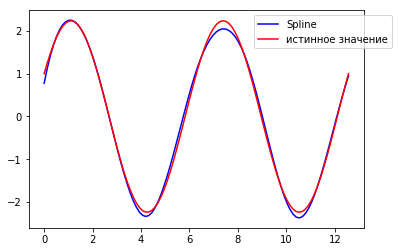

<Figure size 432x288 with 0 Axes>

In [23]:
#plt.plot (x, y, 'o', color = 'orange',label="имперические данные")
plt.plot (xplot, ySpline, color = 'blue', label="Spline")
plt.plot (xplot, yplot_exact, color = 'red',label="истинное значение")
plt.legend(bbox_to_anchor=(1.1, 1))
plt.figure()

In [24]:
def SplineCoefsN (x, y, num_of_nodes, Xk, aplha):
    n = len(x)
    e = np.eye (n)
    Phi = np.zeros ((n, num_of_nodes)) # Matrix of basic functions  
    RegAlpha = np.eye (num_of_nodes) * alpha       
    Phi = BasicFunctionsSplineN (num_of_nodes, Xk, x)  
    PhiT = Phi.T
    G = PhiT @ Phi + RegAlpha
    z = PhiT @ y
    a = np.linalg.solve(G, z)
    return a
def SplineValuesN(a, x):
    Phi = BasicFunctionsSplineN (num_of_nodes, Xk, x)
    values = Phi@a
    return values
def BasicFunctionsSplineN (num_of_nodes, Xk, x):
    m = num_of_nodes 
    PhiFunArray = np.zeros ((len(x), m)) # Matrix of basic functions
    Dkk = np.zeros ((len(x), m))
    Dk = np.zeros ((len(x), m))
    PhiFunArray [:,0] = 1 
    PhiFunArray [:,1] = x  
    for k in range (0, m):
        Dkk [:,k] = 0.
        for i in range (0, len(x)):
            if (x[i]>Xk[k]):
                Dkk [i,k] = (x[i] - Xk[k])**3         
    for k in range (0, m-1):
        Dk[:,k] = (Dkk [:,k] - Dkk [:,m-1])/(Xk[m-1]-Xk[k])
    for k in range (0, m-2):#num_of_nodes-2):
        PhiFunArray [:,k+2] = Dk[:,k] - Dk[:,m-2]#num_of_nodes-2]
    return PhiFunArray

<Figure size 432x288 with 0 Axes>

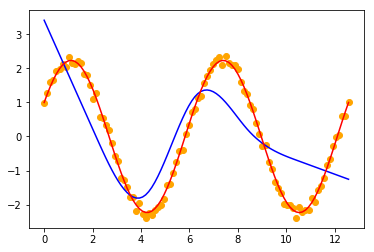

<Figure size 432x288 with 0 Axes>

In [101]:
alpha = 0.000
Xk = np.zeros (num_of_nodes)
dx = (xright - xleft)/(num_of_nodes+1)
for k in range (0, num_of_nodes):
    Xk[k] = xleft + dx*(k+1)
nplot = 100
xplot = np.linspace(xleft,xright,nplot)
yplot_exact =np.cos(xplot)+2*np.sin(xplot)
a = SplineCoefsN (x, y, num_of_nodes, Xk, alpha)
ySpline = SplineValuesN(a, xplot)
plt.plot (x, y, 'o', color = 'orange')
plt.plot (xplot, ySpline, color = 'blue', label="Spline")
plt.plot (xplot, yplot_exact, color = 'red')
plt.figure()